# *M1) Milestone 1: Data Preparation and Cleaning *

# M1) Load the datasets 'fraudTrain.csv' and 'fraudTest.csv'.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.metrics import accuracy_score, mean_absolute_error ,mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import HalvingRandomSearchCV,RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')


In [2]:
fraudTest = pd.read_csv('fraudTest.csv')
fraudTest.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [3]:
fraudTrain = pd.read_csv('fraudTrain.csv')
fraudTrain.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# M1) Explore the data entries and shape of the datasets

In [4]:
fraudTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [5]:
fraudTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
fraudTrain.shape

(1296675, 23)

In [7]:
fraudTest.shape

(555719, 23)

# M1) Check the correlation between numerical features and plot heatmap in both datasets.

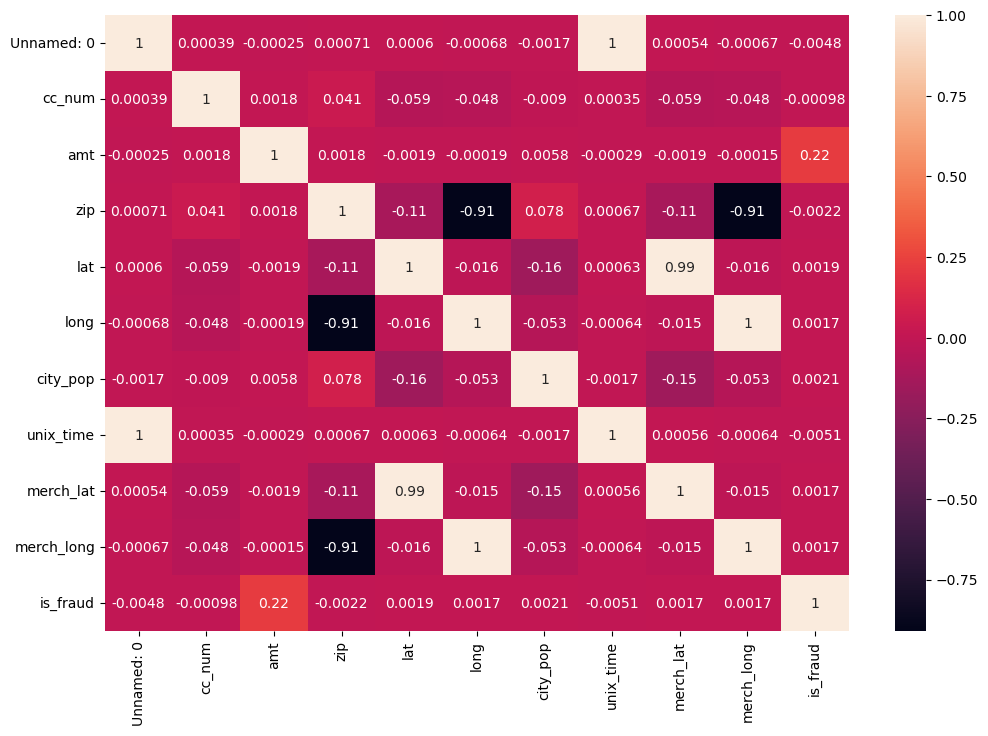

In [8]:
#get numerical columns in train dataset

num_cols_train = fraudTrain.select_dtypes(include=np.number).columns.tolist()

#plot heat map for the numerical columns

plt.figure(figsize=(12,8))
sns.heatmap(fraudTrain[num_cols_train].corr(),annot=True)
plt.show()

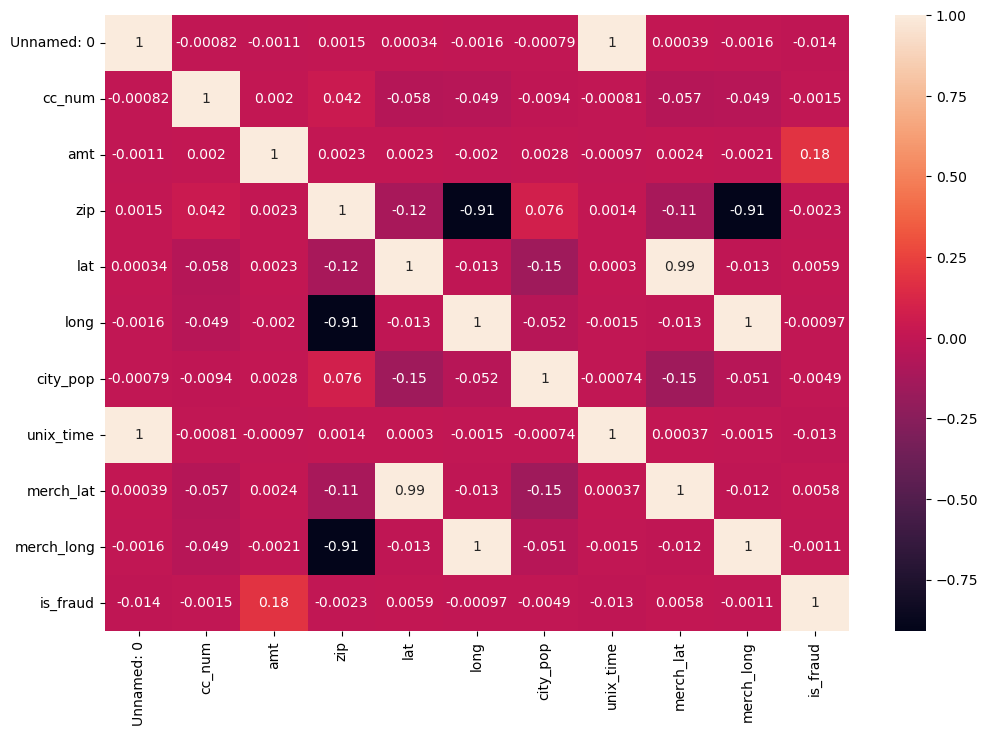

In [9]:
#get numerical columns in test dataset

num_cols_test = fraudTest.select_dtypes(include=np.number).columns.tolist()

#plot heat map for the numerical columns

plt.figure(figsize=(12,8))
sns.heatmap(fraudTest[num_cols_test].corr(),annot=True)
plt.show()

# M1) Drop unnecessary columns like 'Unnamed: 0'.

In [10]:
#drop the column 'Unnamed:0'

fraudTrain.drop('Unnamed: 0',axis=1,inplace=True)
fraudTest.drop('Unnamed: 0',axis=1,inplace=True)




In [11]:
fraudTrain.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [12]:
fraudTest.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# M1) Handle missing values and duplicate entries.

In [13]:
#check for null values in datasets

fraudTrain.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [14]:
fraudTest.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [15]:
#drop duplicate entries in both datasets

fraudTrain.drop_duplicates(inplace=True)
fraudTest.drop_duplicates(inplace=True)



# M1) Convert dob,trans_date_trans_time column in both test & train to datetime data type and creating new 'trans_date' column.

In [16]:
#convert columns dob and trans_date_trans_time into datetime data type

fraudTrain['dob'] = pd.to_datetime(fraudTrain['dob'])
fraudTrain['trans_date_trans_time'] = pd.to_datetime(fraudTrain['trans_date_trans_time'])

In [17]:
fraudTest['dob'] = pd.to_datetime(fraudTest['dob'])
fraudTest['trans_date_trans_time'] = pd.to_datetime(fraudTest['trans_date_trans_time'])

In [18]:
fraudTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  int64         
 2   merchant               555719 non-null  object        
 3   category               555719 non-null  object        
 4   amt                    555719 non-null  float64       
 5   first                  555719 non-null  object        
 6   last                   555719 non-null  object        
 7   gender                 555719 non-null  object        
 8   street                 555719 non-null  object        
 9   city                   555719 non-null  object        
 10  state                  555719 non-null  object        
 11  zip                    555719 non-null  int64         
 12  lat                    555719 non-null  floa

In [19]:
fraudTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [20]:
fraudTest.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [21]:
#create a new column in dataset by extracting trans_date from trans_date_trans_time

fraudTrain['trans_date'] = fraudTrain['trans_date_trans_time'].dt.date
fraudTest['trans_date'] = fraudTest['trans_date_trans_time'].dt.date

In [22]:
fraudTrain.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01


# M1) Check the Fraud and the Normal transaction numbers for test and train datasets

In [23]:
#count the number of fraud and normal transactions in both datasets

fraudTrain['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [24]:
fraudTest['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

# M1) Merge train and test datasets for exploratory data analysis.

In [25]:
#combine both datasets

merged_df = pd.concat([fraudTrain, fraudTest], ignore_index=True)




In [26]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

In [27]:
merged_df.shape

(1852394, 23)

# **M2a) Milestone 2a: Exploratory Data Analysis (EDA)**

# M2a) Count plot of Transactions by top 10 Categories in merged datasets and provide the conclusions and insights gathered.



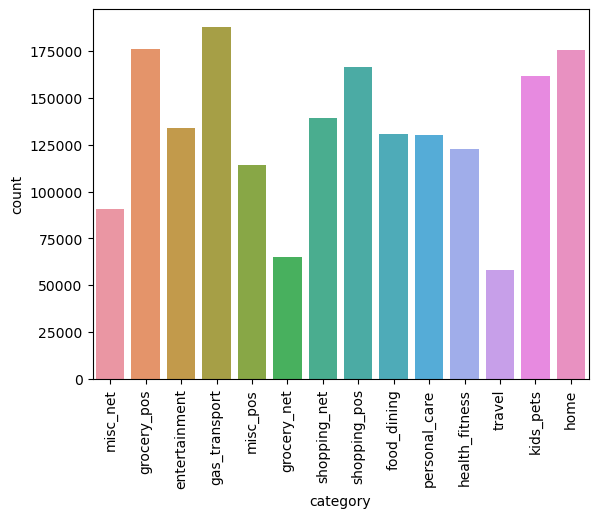

In [28]:
#plot a graph to show the distribution of the category column

sns.countplot(x='category',data=merged_df)
plt.xticks(rotation=90)
plt.show()


In [29]:
#sort category column in dataset by descending order

topten = merged_df['category'].value_counts().sort_values(ascending=False).head(10)

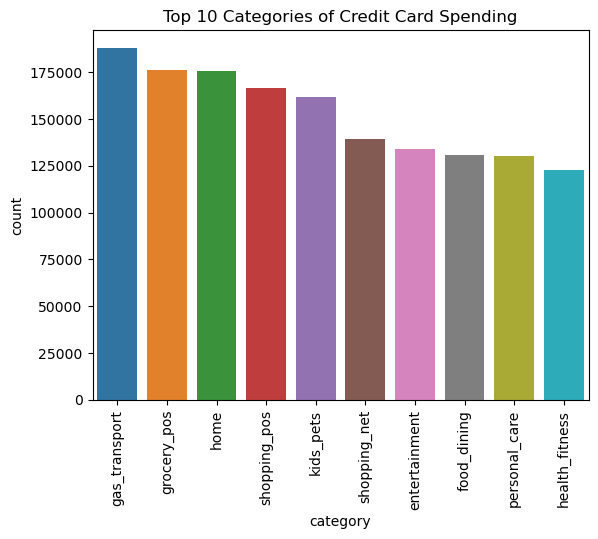

In [30]:
#plot count plot of topten categories

sns.countplot(x='category',data=merged_df,order=topten.index)
plt.xticks(rotation=90)
plt.title('Top 10 Categories of Credit Card Spending')
plt.show()

Insights: Top 10 categories of spending showed that people spend them most on their daily necessities: such as gas for transport, grocery and dining for food, taking care of their health and that of their family/pets.

Additionally, shopping and entertainment can also be deemed as part of many people's lifestyles as they are rather willing to spend money to enjoy themselves.

# M2a) Count plot of Transactions by Gender in merged datasets and provide the conclusions and insights gathered.



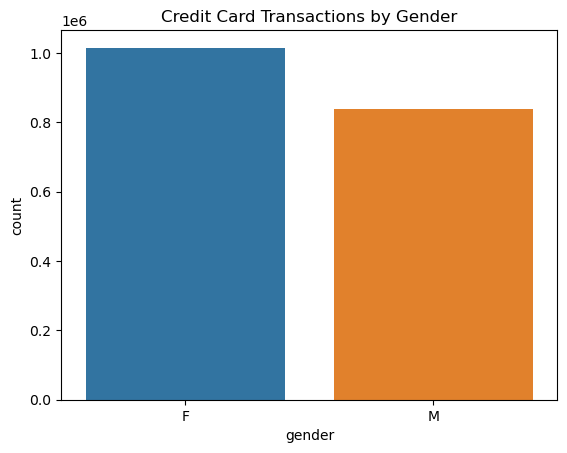

In [31]:
#plot a count plot of transactions by gender

sns.countplot(x='gender',data=merged_df)
plt.title('Credit Card Transactions by Gender')
plt.show()

Insights: Females use credit cards more than males.

In [32]:
#group amt spend by gender

spendingbygender = merged_df.groupby('gender')['amt'].sum()



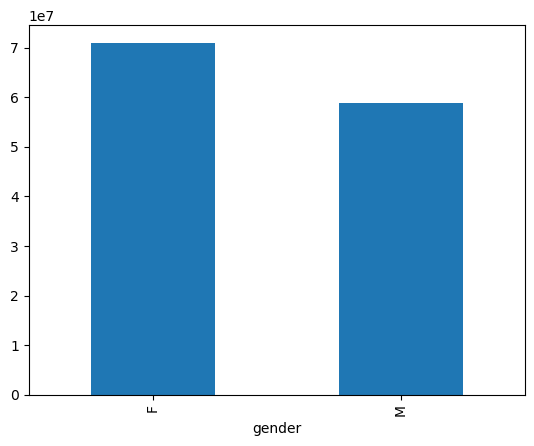

In [33]:
#plot graph of spendingbygender

spendingbygender.plot(kind='bar')
plt.show()

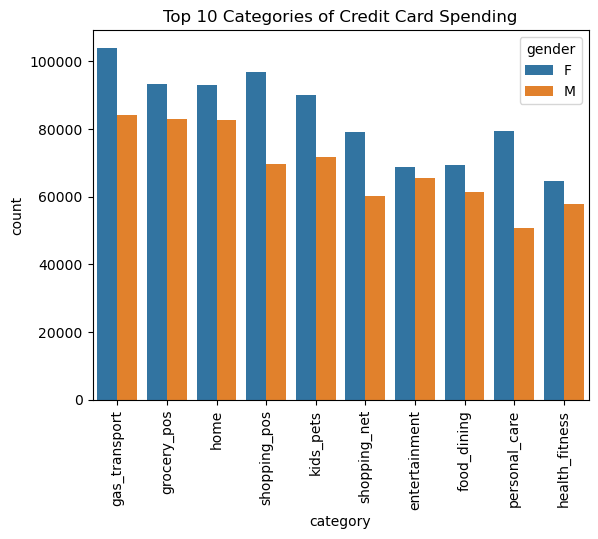

In [34]:
#plot count plot of topten categories with gender hue

sns.countplot(x='category',data=merged_df,order=topten.index, hue='gender')
plt.xticks(rotation=90)
plt.title('Top 10 Categories of Credit Card Spending')
plt.show()

Insights: To further support the point that female use more credit card, from the graphs, it also showed that the amount spent by females on credit cards are also more than the amount spent by males on credit card across the top 10 different categories of spending.

# M2a) Count plot of Transactions by top 10 Merchants in merged datasets and provide the conclusions and insights gathered.

In [35]:
toptenmerchants = merged_df['merchant'].value_counts().sort_values(ascending=False).head(10)

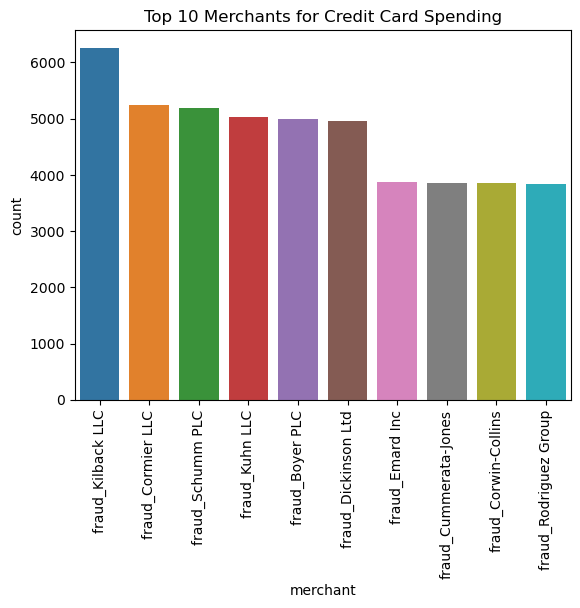

In [36]:
#plot graph of toptenmerchants

sns.countplot(x='merchant',data=merged_df,order=toptenmerchants.index)
plt.xticks(rotation=90)
plt.title('Top 10 Merchants for Credit Card Spending')
plt.show()


Insights: The top 10 merchants for credit card spending showed places where people use their credit cards to spend often at. Kilback looks to be selling automobile parts/related to gas so it might coincincide with the top spending by people in the category of gas/transport.

# M2a) Box plot of transaction amount by category and provide the conclusions and insights gathered.

In [37]:
#group transaction by category

amtbycategory = merged_df.groupby('category')['amt'].sum()

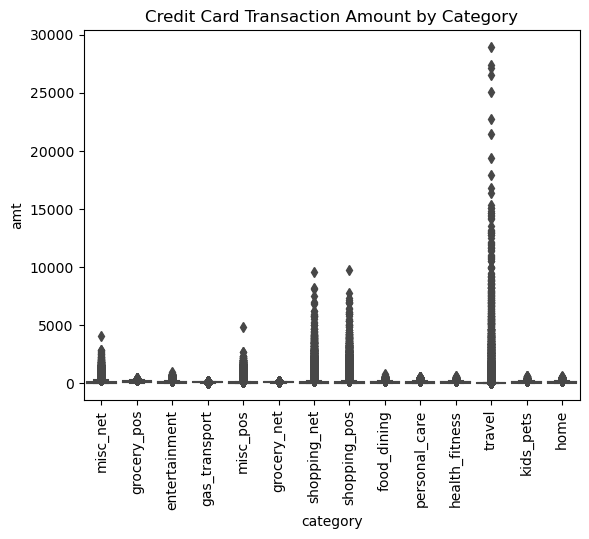

In [38]:
#plot box plot for amtbycategory

sns.boxplot(x='category',y='amt',data=merged_df)
plt.xticks(rotation=90)
plt.title("Credit Card Transaction Amount by Category")
plt.show()

Insights: Although travel is not a top 10 category in terms of transaction volume, it makes sense that people spend the most on travel using their credit cards because travelling is expensive. Moreover, people may be spending on their travels using their credit cards to earn/redeem their travel miles/rewards.



# M2a) A histogram of the transaction amount and provide the conclusions and insights gathered.

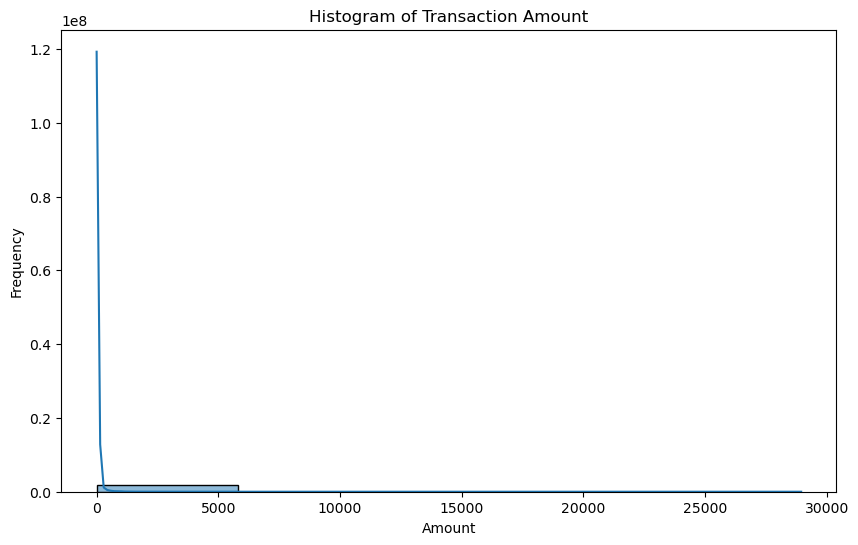

In [39]:
#plot histogram of amt

plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='amt', bins=5, kde=True)
plt.title('Histogram of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

Insights: People rarely use their credit cards for very huge transaction amounts.

# M2b) Milestone 2b: Exploratory Data Analysis (EDA)

# M2b)Top Categories of the Fraudulent Transactions and provide the conclusions and insights gathered.



In [40]:
#Create a new column namely is_fraud_cat with Boolean data type

merged_df['is_fraud_cat'] = merged_df['is_fraud'].astype('bool')

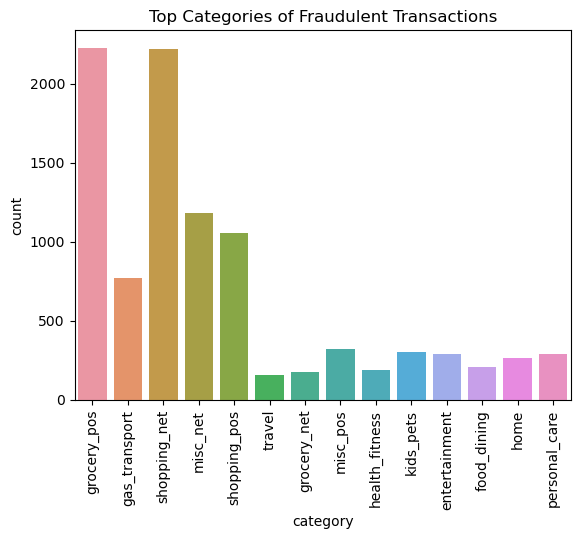

In [41]:
#Create a count plot of the 'category' column for rows where 'is_fraud_cat' is true

sns.countplot(x='category',data=merged_df[merged_df['is_fraud_cat']==True])
plt.xticks(rotation=90)
plt.title('Top Categories of Fraudulent Transactions')
plt.show()


Insights: Grocery and shopping are categories where there are high fraudulent transactions. Both categories are not top categories in credit card spending but instead have higher occurences of fradulent transactions.

# M2b) State-wise Analysis of Fraudulent Transactions and provide the conclusions and insights gathered.



In [42]:
# Filter the data to include only fraudulent transactions

fraudulent_transactions = merged_df[merged_df['is_fraud_cat'] == True]


In [43]:
# Calculate the count of frauds by state

fraud_by_state = fraudulent_transactions['state'].value_counts()

fraud_by_state


state
NY    730
TX    592
PA    572
CA    402
OH    360
FL    334
IL    324
MI    299
MN    280
AL    278
VA    273
MO    262
SC    236
WI    228
KY    222
IN    217
NE    216
IA    211
GA    204
MD    203
OK    200
OR    197
NC    195
AR    195
KS    193
MS    169
NJ    161
TN    159
WV    146
ME    134
WA    126
NM    121
WY    119
CO    115
LA    113
SD     92
MA     87
ND     84
NH     79
VT     72
MT     69
AZ     64
UT     61
CT     56
AK     50
NV     47
ID     33
DC     31
HI     16
RI     15
DE      9
Name: count, dtype: int64

In [44]:
# Calculate the count of frauds by state and get the top 10 states

top_10_states = fraud_by_state.head(10)

top_10_states

state
NY    730
TX    592
PA    572
CA    402
OH    360
FL    334
IL    324
MI    299
MN    280
AL    278
Name: count, dtype: int64

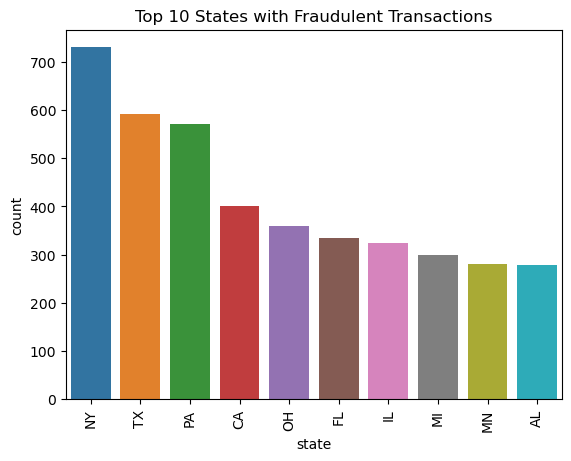

In [45]:
#create count plot for only the top 10 states

sns.countplot(x='state',data=fraudulent_transactions,order=top_10_states.index)
plt.xticks(rotation=90)
plt.title('Top 10 States with Fraudulent Transactions')
plt.show()




Insights: New York has the highest number of fraudulent transactions. It looks like big cities/busy cities (known for shopping, attraction visits) with locals/tourists are susceptible to credit card frauds.

# M2b) City-wise Analysis of Fraudulent Transactions and provide the conclusions and insights gathered.



In [46]:
# Calculate the count of frauds by cities

fraud_by_city = fraudulent_transactions['city'].value_counts()

fraud_by_city


city
Dallas           39
Houston          39
Birmingham       36
New York City    35
Camden           34
                 ..
Kilgore           2
Phenix City       2
Littleton         2
Laramie           2
Sherman           2
Name: count, Length: 887, dtype: int64

In [47]:
# Calculate the count of frauds by cities and get the top 10 cities

top_10_cities = fraud_by_city.head(10)

top_10_cities

city
Dallas           39
Houston          39
Birmingham       36
New York City    35
Camden           34
Allentown        34
Warren           33
Detroit          33
Washington       31
Arcadia          30
Name: count, dtype: int64

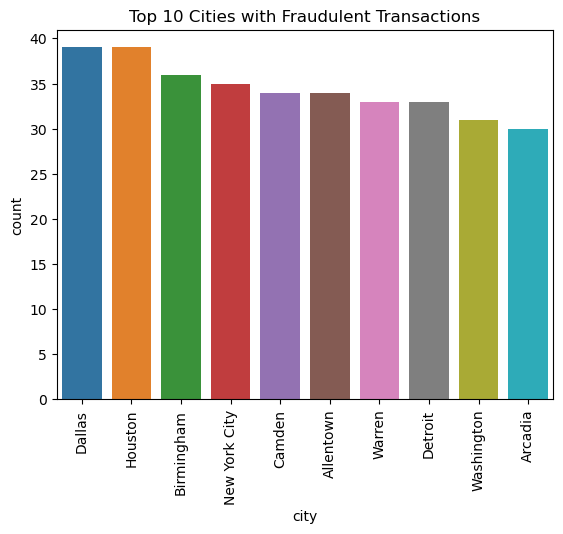

In [48]:
#create count plot for only the top 10 cities

sns.countplot(x='city',data=fraudulent_transactions,order=top_10_cities.index)
plt.xticks(rotation=90)
plt.title('Top 10 Cities with Fraudulent Transactions')
plt.show()

Insights: The top cities with frauds are from the top states with credit card frauds. However, interestingly, two cities from Texas has the highest number of frauds although Texas is the second state with highest fraud.

# M2b) Number of Credit Card Frauds by Job and provide the conclusions and insights gathered.



In [49]:
# Calculate the count of frauds by job

fraud_by_job = fraudulent_transactions['job'].value_counts()

fraud_by_job



job
Quantity surveyor                        69
Naval architect                          66
Materials engineer                       62
Audiological scientist                   58
Senior tax professional/tax inspector    57
                                         ..
Pension scheme manager                    4
Designer, exhibition/display              4
Statistician                              3
Health physicist                          3
Contractor                                2
Name: count, Length: 494, dtype: int64

In [50]:
# Calculate the count of frauds by job and get the top 10 jobs

top_10_jobs = fraud_by_job.head(10)

top_10_jobs

job
Quantity surveyor                        69
Naval architect                          66
Materials engineer                       62
Audiological scientist                   58
Senior tax professional/tax inspector    57
Trading standards officer                56
Podiatrist                               54
Film/video editor                        52
Colour technologist                      51
Exhibition designer                      51
Name: count, dtype: int64

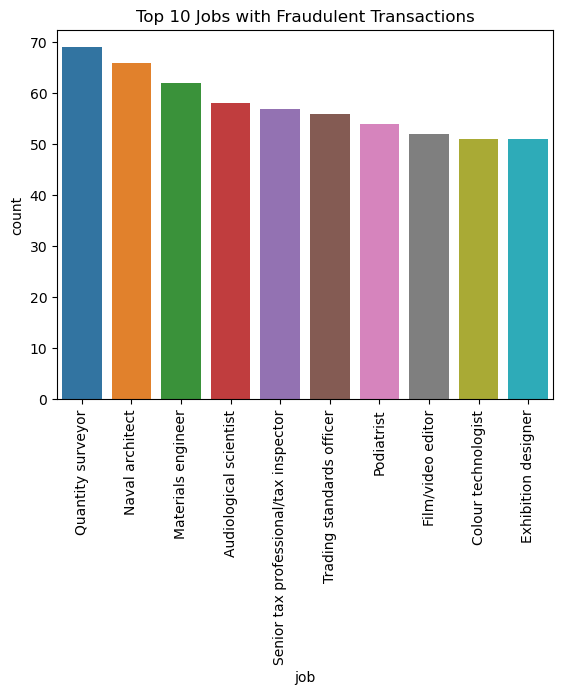

In [51]:
#create count plot for only the top 10 jobs

sns.countplot(x='job',data=fraudulent_transactions,order=top_10_jobs.index)
plt.xticks(rotation=90)
plt.title('Top 10 Jobs with Fraudulent Transactions')
plt.show()

Insights: It looks like jobs from the STEM industry has higher credit card frauds occurences.

# M2b) Number of Credit Card Frauds by Age Groups and provide the conclusions and insights gathered.



In [52]:
fraudulent_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9651 entries, 2449 to 1814246
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  9651 non-null   datetime64[ns]
 1   cc_num                 9651 non-null   int64         
 2   merchant               9651 non-null   object        
 3   category               9651 non-null   object        
 4   amt                    9651 non-null   float64       
 5   first                  9651 non-null   object        
 6   last                   9651 non-null   object        
 7   gender                 9651 non-null   object        
 8   street                 9651 non-null   object        
 9   city                   9651 non-null   object        
 10  state                  9651 non-null   object        
 11  zip                    9651 non-null   int64         
 12  lat                    9651 non-null   float64       
 13  lo

In [53]:
#create a new column age

fraudulent_transactions['age'] = 2023 - fraudulent_transactions['dob'].dt.year



In [54]:
#create age groups

bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']
fraudulent_transactions['age_group'] = pd.cut(fraudulent_transactions['age'], bins=bins, labels=labels, right=False)

#count frauds by age group

fraud_by_age_group = fraudulent_transactions['age_group'].value_counts()

fraud_by_age_group

age_group
51-60    1869
31-40    1867
61-70    1565
41-50    1530
21-30    1030
71-80     758
81-90     659
91+       334
0-20       39
Name: count, dtype: int64

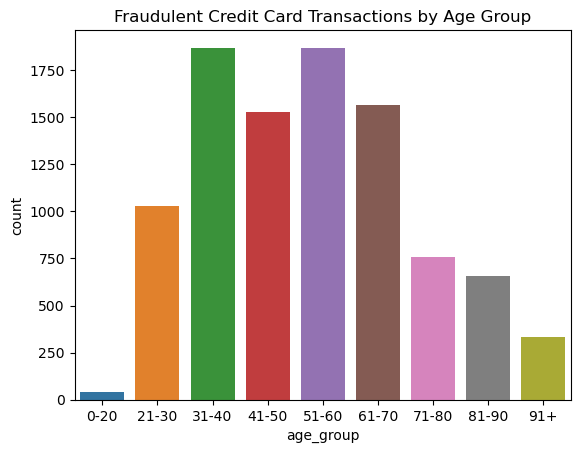

In [55]:
#plot count plot of frauds by age group

sns.countplot(x='age_group',data=fraudulent_transactions)
plt.title('Fraudulent Credit Card Transactions by Age Group')
plt.show()


It seems that majority of the frauds happen with people of the age group 31-40 and 51-60. This meant that these two age groups people commit higher amount of credit card frauds. This might be due to their life stage in which they may have more financial commitments or strains due to having to provide for their family etc (31-40) or possibly preparing for retirement (51-60).

# M2b) Number of Credit Card Frauds by Gender and provide the conclusions and insights gathered.

In [56]:
# Calculate the count of frauds by gender

fraud_by_gender = fraudulent_transactions['gender'].value_counts()

fraud_by_gender

gender
F    4899
M    4752
Name: count, dtype: int64

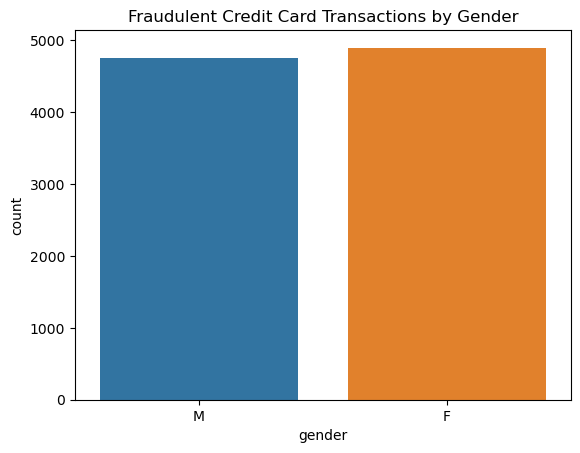

In [57]:
#plot count plot of frauds by gender

sns.countplot(x='gender',data=fraudulent_transactions)
plt.title('Fraudulent Credit Card Transactions by Gender')
plt.show()

Females commit more credit card frauds than males. However, this may also be due to the fact that in general females have more credit card transactions than males. Yet, when it comes to the top 10 jobs commiting credit card frauds, they looked like male-dominated industries, although there could also be females working in those job roles as well.

# M2b) Number of Credit Card Frauds by Year and provide the conclusions and insights gathered.



In [58]:
#create new column in fradulent_transaction getting the year

fraudulent_transactions['year'] = fraudulent_transactions['trans_date_trans_time'].dt.year

In [59]:
# number of Credit Card Frauds by Year

fraud_by_year = fraudulent_transactions['year'].value_counts()

fraud_by_year


year
2019    5220
2020    4431
Name: count, dtype: int64

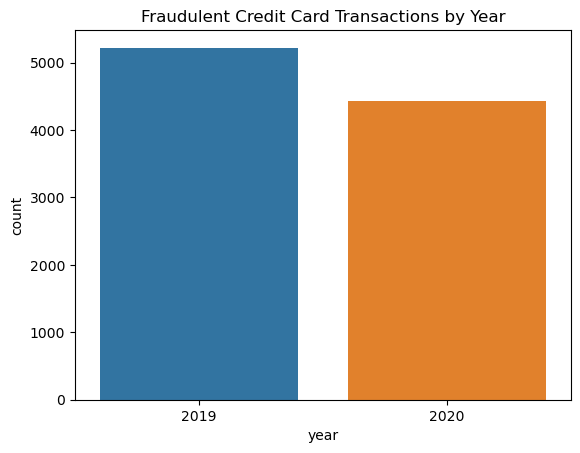

In [60]:
#plot count plot of fraud by year

sns.countplot(x='year',data=fraudulent_transactions)
plt.title('Fraudulent Credit Card Transactions by Year')
plt.show()

Insights: There were more credit card frauds committed in year 2019 as compared to year 2020. This might possibly be due to decreased spending/people going out less in 2020 as the covid pandemic sets in.

# M2b) Number of Credit Card Frauds by latitudinal distance and provide the conclusions and insights gathered.



In [61]:
# Calculate the count of frauds by lat

fraud_by_lat = fraudulent_transactions['lat'].value_counts()

fraud_by_lat

lat
40.7687    24
42.5164    23
39.4336    23
40.8555    21
43.0048    21
           ..
41.4247     2
27.9865     2
34.2651     2
39.5994     2
33.5623     2
Name: count, Length: 961, dtype: int64

In [62]:
# Calculate the count of frauds by lat and get the top 10 lat

top_10_lat = fraud_by_lat.head(10)

top_10_lat

lat
40.7687    24
42.5164    23
39.4336    23
40.8555    21
43.0048    21
34.1556    20
40.0456    19
47.8342    19
38.0261    19
41.3851    18
Name: count, dtype: int64

Insights: The lattitudes are pretty close together, within the 30-40s range. This implies that geographically they are pretty close together and are possibly coinciding with the geography of the top fraud states/cities such as New York/Texas.

# M2b) Number of Credit Card Frauds by longitudinal distance and provide the conclusions and insights gathered.

In [63]:
# Calculate the count of frauds by long

fraud_by_long = fraudulent_transactions['long'].value_counts()

fraud_by_long

long
-80.3592     24
-82.9832     23
-82.7243     21
-79.7372     21
-78.6847     21
             ..
-82.0139      2
-105.0044     2
-77.8670      2
-96.6184      2
-94.8653      2
Name: count, Length: 961, dtype: int64

In [64]:
# Calculate the count of frauds by long and get the top 10 long

top_10_long = fraud_by_long.head(10)

top_10_long

long
-80.3592     24
-82.9832     23
-82.7243     21
-79.7372     21
-78.6847     21
-108.8964    21
-118.2322    20
-97.6666     19
-90.0476     19
-97.4735     19
Name: count, dtype: int64

Insights: Combining the top lat and top long will probably pinpoint a place where high credit card frauds were committed. For instance, the top lat 40.7687 and top long -80.3592 refers to [40.7687, -80.3592] which is a place in Chippewa Township, PA, USA and PA was the third highest state where credit card frauds were committed.

# Milestone 3: Features Engineering

### M3) Encode categorical variables using techniques suitable for the model, such as one-hot encoding.

In [65]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

In [79]:
#drop unnecessary columns and highly correlated columns (lat, merch_lat, long, merch_long) based on earlier heatmap 

new_df = merged_df.drop(['trans_date_trans_time','cc_num','merchant','state','job','trans_num', 'unix_time','first', 'last', 'street', 'city', 'merch_lat', 'merch_long'], axis=1)

In [80]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 11 columns):
 #   Column        Dtype         
---  ------        -----         
 0   category      object        
 1   amt           float64       
 2   gender        object        
 3   zip           int64         
 4   lat           float64       
 5   long          float64       
 6   city_pop      int64         
 7   dob           datetime64[ns]
 8   is_fraud      int64         
 9   trans_date    object        
 10  is_fraud_cat  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 143.1+ MB


In [81]:
new_df['trans_date'] = pd.to_datetime(new_df['trans_date'])
new_df['age'] = 2023 - new_df['dob'].dt.year

In [82]:

new_df['trans_year'] = new_df['trans_date'].dt.year
new_df['trans_month'] = new_df['trans_date'].dt.month

In [85]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 14 columns):
 #   Column        Dtype         
---  ------        -----         
 0   category      object        
 1   amt           float64       
 2   gender        object        
 3   zip           int64         
 4   lat           float64       
 5   long          float64       
 6   city_pop      int64         
 7   dob           datetime64[ns]
 8   is_fraud      int64         
 9   trans_date    datetime64[ns]
 10  is_fraud_cat  bool          
 11  age           int64         
 12  trans_year    int32         
 13  trans_month   int32         
dtypes: bool(1), datetime64[ns](2), float64(3), int32(2), int64(4), object(2)
memory usage: 171.4+ MB


In [88]:
# Encode categorical variables using techniques suitable for the model, such as one-hot encoding
new_df_copy = new_df
new_df_copy = pd.get_dummies(new_df, columns=['category'], dtype=int)
new_df_copy

,amt,gender,zip,lat,long,city_pop,dob,is_fraud,trans_date,is_fraud_cat,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,F,28654,36.0788,-81.1781,3495,1988-03-09,0,2019-01-01,False,...,0,0,0,0,1,0,0,0,0,0
1,107.23,F,99160,48.8878,-118.2105,149,1978-06-21,0,2019-01-01,False,...,1,0,0,0,0,0,0,0,0,0
2,220.11,M,83252,42.1808,-112.2620,4154,1962-01-19,0,2019-01-01,False,...,0,0,0,0,0,0,0,0,0,0
3,45.00,M,59632,46.2306,-112.1138,1939,1967-01-12,0,2019-01-01,False,...,0,0,0,0,0,0,0,0,0,0
4,41.96,M,24433,38.4207,-79.4629,99,1986-03-28,0,2019-01-01,False,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,43.77,M,63453,40.4931,-91.8912,519,1966-02-13,0,2020-12-31,False,...,0,1,0,0,0,0,0,0,0,0
1852390,111.84,M,77566,29.0393,-95.4401,28739,1999-12-27,0,2020-12-31,False,...,0,0,0,1,0,0,0,0,0,0
1852391,86.88,F,99323,46.1966,-118.9017,3684,1981-11-29,0,2020-12-31,False,...,0,0,0,1,0,0,0,0,0,0
1852392,7.99,M,83643,44.6255,-116.4493,129,1965-12-15,0,2020-12-31,False,...,0,0,0,0,0,0,0,0,0,1


In [89]:
total= new_df_copy.drop(['trans_date', 'dob'], axis=1)

In [90]:
total.columns

Index(['amt', 'gender', 'zip', 'lat', 'long', 'city_pop', 'is_fraud',
       'is_fraud_cat', 'age', 'trans_year', 'trans_month',
       'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel'],
      dtype='object')

In [96]:
# Apply the Minmax Normalizer to the columns 'zip', 'age', 'trans_month', 'trans_year', 'latitudinal_distance','longitudinal_distance' of the total dataframes

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

total[['zip', 'age', 'trans_month', 'trans_year', 'lat', 'long']] = scaler.fit_transform(total[['zip', 'age', 'trans_month', 'trans_year', 'lat', 'long']])

In [97]:
total.head()

,amt,gender,zip,lat,long,city_pop,is_fraud,is_fraud_cat,age,trans_year,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,F,0.277680,0.343968,0.864638,3495,0,False,0.209877,0.0,...,0,0,0,0,1,0,0,0,0,0
1,107.23,F,0.992287,0.618450,0.485682,149,0,False,0.333333,0.0,...,1,0,0,0,0,0,0,0,0,0
2,220.11,M,0.831053,0.474727,0.546553,4154,0,False,0.530864,0.0,...,0,0,0,0,0,0,0,0,0,0
3,45.00,M,0.591655,0.561509,0.548070,1939,0,False,0.469136,0.0,...,0,0,0,0,0,0,0,0,0,0
4,41.96,M,0.234898,0.394153,0.882190,99,0,False,0.234568,0.0,...,0,0,0,0,0,1,0,0,0,0


In [98]:
#create two different dataframe of majority and minority class
df_majority = total[(total['is_fraud']==0)]
df_minority = total[(total['is_fraud']==1)]



In [99]:
df_majority.shape

(1842743, 25)

In [100]:
df_minority.shape

(9651, 25)

In [101]:
#save dataset to csv

total.to_csv('Capstone_Dataset.csv',index=False)